In [17]:
import pandas as pd
import numpy as np

In [18]:
bike_data = pd.read_csv('seoulBikeData_cleaned.csv')

# Seoul Bike Data
The following data is collected (and already cleaned) from a bike rental company in Seoul South Korea
The target variable that we would like to predict is the number of bikes that will be rented on a given day.

In [19]:
bike_data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,1


In [20]:
bike_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2.504110,0.049315,0.966324
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.114408,0.216537,0.180404
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,3.000000,0.000000,1.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,3.000000,0.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,4.000000,1.000000,1.000000


# The dataset in brief

This is a bike rental dataset. The target variable that we want to predict is "Rented Bike Count", the rest of the variables are information about that particular day.
The variable "Season" is encoded into numbers
  * Winter - 1
  * Spring - 2
  * Summer - 3
  * Autumn - 4
 
The variable Holiday is binary:
  * Yes - 1
  * No - 0

The Variable Functioning day (was the rental company funcitoning) is also binary
  * Yes - 1
  * No - 0


The rest of variables are self-explanatory.  Please read them over and make an brief mental opinion.

# Q1 - The features of the dataset - 2 marks

What do you expect to be the most important features of the dataset?
Choose 3 and explain why. Use complete english sentences

# Q1 - Answer
Your answer here -----------------------





End answer ----------------

In [21]:
# now we make the data into X and y
y = bike_data["Rented Bike Count"]
X = bike_data.drop( "Rented Bike Count", axis = 1,)

In [22]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,1


## Splitting the data
Split the data into two parts, set test_size = 0.2, and the random seed to be 42



In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train a Ridge Regression model

Train a ridge regression model. Make sure to scale your data with the standard-scaler beforehand.

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(bike_data))

StandardScaler()


In [69]:
from sklearn.linear_model import Ridge
reg = Ridge()
reg.fit(X, y)



Ridge()

# Feature importances

One way to view the importance of any given feature is by the magnitude (absolute value) of it's coefficient.
Examine the coefficients of your ridge model below using the attribue `coef_` 

The index of the coefficient relates to which feature it is in the dataset column.
The 0th index feature, is  Hour.
The 1st index feature is Temperature and so on.



In [64]:
from sklearn import linear_model
import matplotlib.pyplot as plt

In [72]:
reg.coef_
coefs = reg.coef_

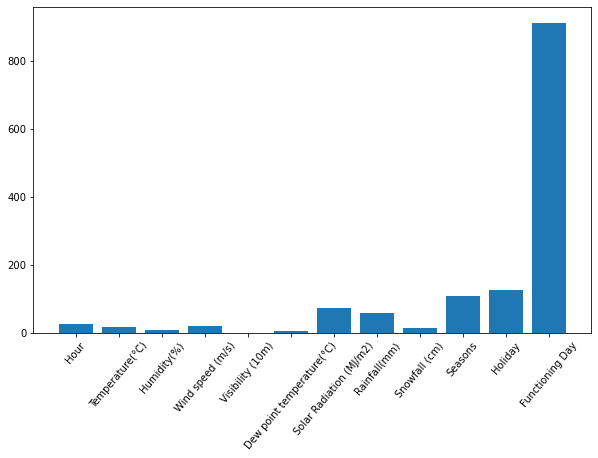

In [73]:

# plotting code to help you see the coefficients by importance
plt.figure(figsize=(10,6))
plt.bar(X.columns, np.abs(coefs))
plt.xticks(rotation=50);

# Q2 -3 marks
Which features were most important according to the Ridge model.
Did it line up with your predictions? 

List the most important features the ridge model chose and include the coefficients.  What features did you choose? How close were you?

# Q2 answer
Your answer here -----------------------







End answer ----------------

# Find the best fit

Now go ahead and try to find the best possible fit
I want to know from the following options
Scaling - Standard Scaling
Regression - Linear Regression, Ridge, SGDRegression, Dummy Regressor

You must use the split we have already created.
Be sure that you are scaling from the original split (and don't accidentally overwrite it)


In [ ]:
# do you work in these cells. Feel free to add as many as you like. You can also add cells below. I really don't care

# Q3 : What is the best model / scaler combination based on pure test scores? - 5 marks
You must give complete sentence answers. Please provide direct evidence (numbers) for your response

# Q3 Answer
Your answer here -----------------------







End answer ----------------

# Q4: What is the best model/ scaler combination based on the best balance of bias / variance trade off? - 5 marks
You must give complete sentence answers. Please provide direct evidence (numbers) for your response

# Q4 Answer
Your answer here -----------------------








End answer ----------------

# Q5: What model / scaler combination would you pick and _why_ ? - 5 marks
You must give complete sentence answers. Please provide direct evidence (numbers) for your response

# Q5 answer
Your answer here -----------------------









End answer ----------------